In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

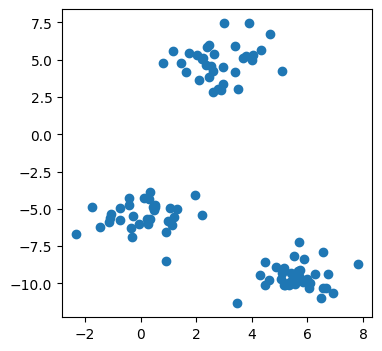

In [121]:
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=3, random_state=10, shuffle=True, cluster_std=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
classes = np.unique(y_test)

fig, ax = plt.subplots(figsize=(4, 4))
#ax[0].scatter(X[:, 0], y)
#ax[1].scatter(X[:, 1], y)
ax.scatter(X[:, 0], X[:, 1])
plt.show()


In [123]:
class MultiClassPerceptron(object):
    def __init__(self):
        pass
    
    def activation_function(self, preds):
        return np.argmax(preds)
    
    def fit(self, X, y, epochs, nrn=25, lr=0.1):
        n, m = X.shape
        classes = np.unique(y)
        n_classes = len(classes)


        h = np.random.uniform(0, 1, n_classes)
        bias = np.random.uniform(0, 1, n_classes)
        error = np.random.uniform(0, 1, n_classes)
        update = np.random.uniform(0, 1, n_classes)
        weights = np.zeros((n_classes, m))
        n_weights = np.random.uniform(0, 1, (nrn, n_classes, m))
        neurons = np.ones(nrn)
        for e in range(epochs):
            for i in range(len(X)):
                for j in range(nrn):
                    for c in range(n_classes):
                        h[c] = np.dot(X[i], n_weights[j][c]) + bias[c]
                    neurons[j] = classes[self.activation_function(h)]


                    if y[i] != neurons[j]:
                        error[int(y[i])] = (y[i] - neurons[j])
                        error[int(neurons[j])] = (y[i] - neurons[j])

                        update[int(y[i])] =  lr * error[int(y[i])]
                        update[int(neurons[j])] =  lr * error[int(neurons[j])]

                        bias[int(y[i])] = bias[int(y[i])] + update[int(y[i])]
                        bias[int(neurons[j])] = bias[int(neurons[j])] + update[int(neurons[j])]

                        n_weights[j][int(neurons[j])] = n_weights[j][int(neurons[j])] - update[int(neurons[j])] * X[i]
                        n_weights[j][int(y[i])] = n_weights[j][int(y[i])] + update[int(y[i])] * X[i]
                        """n_weights[j][int(neurons[j])] = n_weights[j][int(neurons[j])] - X[i]
                        n_weights[j][int(y[i])] = n_weights[j][int(y[i])] + X[i]"""

                    """if y[i] != neurons[j]:
                        for c in range(n_classes):
                            error[c] = (y[i] - neurons[j])
                            update[c] =  lr * error[c]
                            n_weights[j][c] = n_weights[j][c] + update[c] * X[i]
                            bias[c] = bias[c] + update[c]
                    else:
                        for c in range(n_classes):
                            if classes[c] != neurons[j]:
                                error[c] = (y[i] - neurons[j])
                                update[c] =  lr * error[c]
                                n_weights[j][c] = n_weights[j][c] + update[c] * X[i]
                                bias[c] = bias[c] + update[c]"""


        for n in range(len(n_weights)):
            for c in range(n_classes):
                for w in range(len(weights[c])):
                    weights[c][w] = weights[c][w] + n_weights[n][c][w]
        for c in range(n_classes):
            for w in range(len(weights[c])):
                weights[c][w] = weights[c][w] / len(n_weights)
  
        return weights, bias

    
    def predict(self, X, weights, bias, classes):
        h = np.ones((X.shape[0], weights.shape[0]))
        self.y_preds = np.ones(X.shape[0])
        for i in range(len(X)):
            h[i] = np.dot(weights, X[i])+bias
            self.y_preds[i] = classes[self.activation_function(h[i])]
         
    def accuracy(self, y_test):
        return (np.sum(self.y_preds == y_test)/len(self.y_preds))*100
           
    def get_boundary(self, bias, weights, x):
        y = np.ones((len(weights)))
        for i in range(len(y)):
            m = - weights[i][0] / weights[i][1]
            b = - bias[i] / weights[i][1]
            y[i] = m * x + b 
        return y
        
model = MultiClassPerceptron()
weights, bias = model.fit(X_train, y_train, epochs=100, nrn=5, lr=0.1)
model.predict(X_test, weights, bias, classes)
accuracy = model.accuracy(y_test)
print("Accuracy: {0}%".format(accuracy))
fig, ax = plt.subplots(1)
ax.scatter(X[:, 0], X[:, 1])

x = np.linspace(-10, 10, 1000)
y1 = np.array([model.get_boundary(bias, weights, i) for i in x])
plt.xlim([-20, 20])
plt.ylim([-15, 15])
plt.plot(x, y1)
plt.show()

IndexError: invalid index to scalar variable.